In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
# read in csv file
df = pd.read_csv(r'C:\Users\Chanachai puck\Desktop\data\SuperStore2\superstore2.csv')
df.rename(columns=lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
# Copy Dataframe
df_copy = df.copy()

In [4]:
# Missing data checking
df_copy.isna().sum()

Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
City                  0
State                 0
Country               0
Postal_Code       41296
Market                0
Region                0
Product_ID            0
Category              0
Sub_Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
dtype: int64

In [5]:
df_copy.drop('Postal_Code', axis=1, inplace=True)

In [6]:
# Data duplicate checking
df_copy.duplicated().sum()

0

In [7]:
# Data types checking
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          51290 non-null  int64  
 1   Order_ID        51290 non-null  object 
 2   Order_Date      51290 non-null  object 
 3   Ship_Date       51290 non-null  object 
 4   Ship_Mode       51290 non-null  object 
 5   Customer_ID     51290 non-null  object 
 6   Customer_Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product_ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub_Category    51290 non-null  object 
 16  Product_Name    51290 non-null  object 
 17  Sales           51290 non-null 

In [8]:
df_copy["Order_Date"] = pd.to_datetime(df_copy["Order_Date"])
df_copy["Ship_Date"] = pd.to_datetime(df_copy["Ship_Date"])
df_copy['Year'] = df_copy["Order_Date"].dt.year
df_copy['Month'] = df_copy['Order_Date'].dt.month
df_copy['Month_Name'] = df_copy['Month'].apply(lambda x: calendar.month_abbr[x])
df_copy.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Year,Month,Month_Name
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,1,Jan
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,1,Jan
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,1,Jan
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,1,Jan
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,1,Jan


In [9]:
df_copy.dtypes

Row_ID                     int64
Order_ID                  object
Order_Date        datetime64[ns]
Ship_Date         datetime64[ns]
Ship_Mode                 object
Customer_ID               object
Customer_Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product_ID                object
Category                  object
Sub_Category              object
Product_Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping_Cost            float64
Order_Priority            object
Year                       int64
Month                      int64
Month_Name                object
dtype: object

In [10]:
df_copy.describe()

,Row_ID,Sales,Quantity,Discount,Profit,Shipping_Cost,Year,Month
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,7.143420
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,3.394749
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,4.000000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,7.000000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,10.000000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,12.000000


In [11]:
df1=df_copy[['Order_Date','Sales','Profit','Year','Month_Name']]
df1

,Order_Date,Sales,Profit,Year,Month_Name
0,2011-01-01,408.300,106.1400,2011,Jan
1,2011-01-01,120.366,36.0360,2011,Jan
2,2011-01-01,66.120,29.6400,2011,Jan
3,2011-01-01,44.865,-26.0550,2011,Jan
4,2011-01-01,113.670,37.7700,2011,Jan
...,...,...,...,...,...
51285,2014-12-31,13.904,4.5188,2014,Dec
51286,2014-12-31,3.990,0.4200,2014,Dec
51287,2014-12-31,26.400,12.3600,2014,Dec
51288,2014-12-31,7.120,0.5600,2014,Dec


In [13]:
df1.groupby('Year')['Month_Name'].value_counts()

Year  Month_Name
2011  Dec           1138
      Sep            961
      Nov            897
      Aug            816
      Jun            801
      Oct            734
      Jul            670
      Mar            653
      Jan            621
      Apr            611
      May            562
      Feb            534
2012  Nov           1279
      Dec           1138
      Sep           1090
      Jun           1066
      Aug            993
      Oct            929
      May            914
      Mar            824
      Jul            756
      Apr            721
      Jan            629
      Feb            623
2013  Sep           1492
      Nov           1491
      Dec           1427
      Jun           1419
      Aug           1337
      May           1159
      Oct           1119
      Jul           1008
      Apr            900
      Mar            896
      Jan            797
      Feb            754
2014  Nov           1993
      Dec           1831
      Sep           1694
      Oc

In [12]:
sales=df1.groupby(['Year','Month_Name']).sum()
sales

Sales       Profit
Year Month_Name                           
2011 Apr         128833.47034  13405.46924
     Aug         219223.49524  19650.67124
     Dec         292359.96752  33006.85862
     Feb         134969.94086  17588.83726
     Jan         138241.30042  13457.23302
     Jul         162034.69756  10631.84406
     Jun         189338.43966  25932.87796
     Mar         171455.59372  16169.36062
     May         148146.72092  14777.45792
     Nov         214934.29386  21261.40536
     Oct         204675.07846  30745.54166
     Sep         255237.89698  32313.25458
2012 Apr         187469.96192  20804.00532
     Aug         271669.66086  36511.44996
     Dec         291972.33306  31968.30416
     Feb         152661.15144  17828.18244
     Jan         162800.89338  19627.42058
     Jul         174394.02808  21725.18808
     Jun         249289.77172  34358.03962
     Mar         201608.72784  22752.87684
     May         218960.16042  22865.39572
     Nov         270723.05356  26160.60686
     Oct         239321.09904  27773.87454
     Sep         256567.85308  25039.93498
2013 Apr         233181.34844  26008.05144
     Aug         323876.60716  32977.75576
     Dec         371245.40880  47654.27990
     Feb         191062.77216  31553.99756
     Jan         206459.19582  26052.40252
     Jul         223642.65664  27019.91294
     Jun         341162.34370  43298.85000
     Mar         230547.79468  34873.71938
     May         304509.96336  39053.30946
     Nov         383039.21248  51720.88568
     Oct         270121.87570  27871.97470
     Sep         326897.27044  18850.09084
2014 Apr         302132.54000  35709.53320
     Aug         432731.04194  46443.47934
     Dec         427757.39800  48920.76000
     Feb         244159.30486  29454.01876
     Jan         268265.52240  31447.74660
     Jul         278672.17326  26450.70856
     Jun         372577.23298  40869.02108
     Mar         347720.96868  50097.04458
     May         304798.83604  34335.60404
     Nov         508954.73156  55561.72406
     Oct         406659.41500  52342.49740
     Sep         405436.70584  52533.83284

In [13]:
#Split the above data into one table each year
year_2011 = sales.loc[(2011,slice(None)),:].reset_index()
year_2012 = sales.loc[(2013,slice(None)),:].reset_index()
year_2013 = sales.loc[(2013,slice(None)),:].reset_index()
year_2014 = sales.loc[(2014,slice(None)),:].reset_index()
#Check the result
year_2011

,Year,Month_Name,Sales,Profit
0,2011,Apr,128833.47034,13405.46924
1,2011,Aug,219223.49524,19650.67124
2,2011,Dec,292359.96752,33006.85862
3,2011,Feb,134969.94086,17588.83726
4,2011,Jan,138241.30042,13457.23302
5,2011,Jul,162034.69756,10631.84406
6,2011,Jun,189338.43966,25932.87796
7,2011,Mar,171455.59372,16169.36062
8,2011,May,148146.72092,14777.45792
9,2011,Nov,214934.29386,21261.40536


In [14]:
Profit=pd.concat([year_2011['Profit'],year_2012['Profit'],year_2013['Profit'],year_2014['Profit']],axis=1)
Profit

,Profit,Profit,Profit,Profit
0,13405.46924,26008.05144,26008.05144,35709.53320
1,19650.67124,32977.75576,32977.75576,46443.47934
2,33006.85862,47654.27990,47654.27990,48920.76000
3,17588.83726,31553.99756,31553.99756,29454.01876
4,13457.23302,26052.40252,26052.40252,31447.74660
5,10631.84406,27019.91294,27019.91294,26450.70856
6,25932.87796,43298.85000,43298.85000,40869.02108
7,16169.36062,34873.71938,34873.71938,50097.04458
8,14777.45792,39053.30946,39053.30946,34335.60404
9,21261.40536,51720.88568,51720.88568,55561.72406


In [15]:
Profit.columns=['2011','2012','2013','2014']
Profit.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Profit

,2011,2012,2013,2014
Jau,13405.46924,26008.05144,26008.05144,35709.53320
Feb,19650.67124,32977.75576,32977.75576,46443.47934
Mar,33006.85862,47654.27990,47654.27990,48920.76000
Apr,17588.83726,31553.99756,31553.99756,29454.01876
May,13457.23302,26052.40252,26052.40252,31447.74660
Jun,10631.84406,27019.91294,27019.91294,26450.70856
Jul,25932.87796,43298.85000,43298.85000,40869.02108
Aug,16169.36062,34873.71938,34873.71938,50097.04458
Sep,14777.45792,39053.30946,39053.30946,34335.60404
Oct,21261.40536,51720.88568,51720.88568,55561.72406


Text(0, 0.5, 'Year')

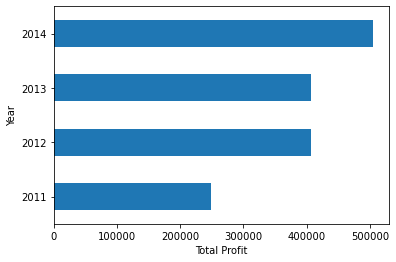

In [16]:
Sum=Profit.sum()
Sum.plot(kind='barh')
plt.xlabel("Total Profit")
plt.ylabel("Year")

In [17]:
Market_Year_Sales = df_copy.groupby(['Market', 'Year']).agg({'Sales':'sum'}).reset_index()
Market_Year_Sales.head()

,Market,Year,Sales
0,APAC,2011,6.392453e+05
1,APAC,2012,7.627193e+05
2,APAC,2013,9.745809e+05
3,APAC,2014,1.209199e+06
4,Africa,2011,1.271873e+05


Text(0.5, 1.0, 'Market_Sales')

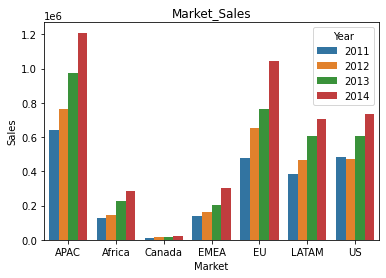

In [18]:
sns.barplot(x='Market',y='Sales',hue='Year',data=Market_Year_Sales)
plt.title('Market_Sales')

In [19]:
productId_count = df_copy.groupby('Sub_Category').count()['Customer_ID'].sort_values(ascending=False)
productId_count.head(10)

Sub_Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Name: Customer_ID, dtype: int64

In [20]:
productId_count = df_copy.groupby('Sub_Category').sum()['Sales'].sort_values(ascending=False)
productId_count.head(10)

Sub_Category
Phones         1.706824e+06
Copiers        1.509436e+06
Chairs         1.501682e+06
Bookcases      1.466572e+06
Storage        1.127086e+06
Appliances     1.011064e+06
Machines       7.790601e+05
Tables         7.570419e+05
Accessories    7.492370e+05
Binders        4.619115e+05
Name: Sales, dtype: float64

In [21]:
productId_count = df_copy.groupby('Sub_Category').sum()['Profit'].sort_values(ascending=False)
productId_count.head(10)

Sub_Category
Copiers        258567.54818
Phones         216717.00580
Bookcases      161924.41950
Appliances     141680.58940
Chairs         140396.26750
Accessories    129626.30620
Storage        108461.48980
Binders         72449.84600
Paper           59207.68270
Machines        58867.87300
Name: Profit, dtype: float64

<AxesSubplot:ylabel='Segment'>

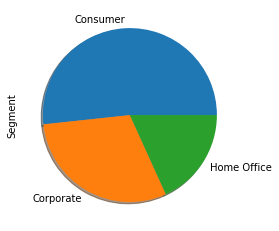

In [22]:
df_copy["Segment"].value_counts().plot(kind='pie',shadow=True)

In [23]:
Category=df_copy.groupby(['Category','Sub_Category']).agg({'Sales':'sum'}).reset_index()
Category

,Category,Sub_Category,Sales
0,Furniture,Bookcases,1.466572e+06
1,Furniture,Chairs,1.501682e+06
2,Furniture,Furnishings,3.855783e+05
3,Furniture,Tables,7.570419e+05
4,Office Supplies,Appliances,1.011064e+06
5,Office Supplies,Art,3.720920e+05
6,Office Supplies,Binders,4.619115e+05
7,Office Supplies,Envelopes,1.709043e+05
8,Office Supplies,Fasteners,8.324232e+04
9,Office Supplies,Labels,7.340403e+04


Text(0.5, 1.0, 'Sub-Category Sales')

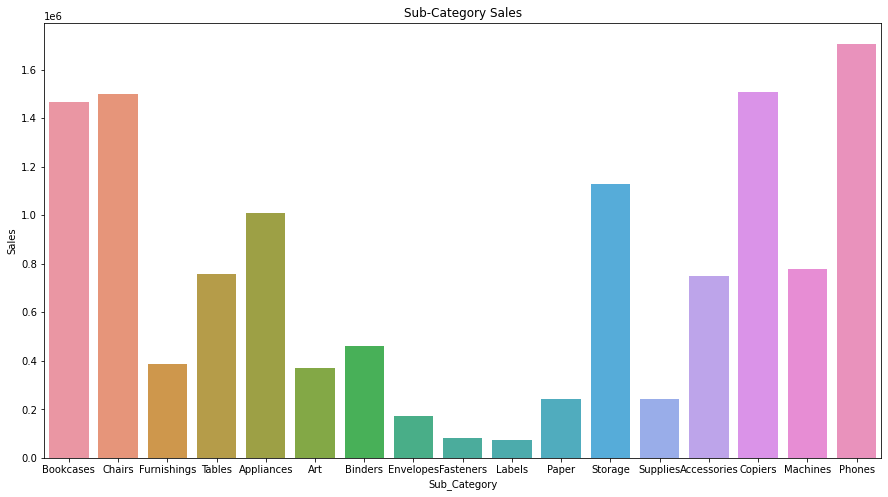

In [47]:
ax = plt.subplots(figsize = (15,8))
sns.barplot(x='Sub_Category',y='Sales',data=Category)
plt.title('Sub-Category Sales')
